# Data cleaning + visualization for HOI dataset

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hoi_df = pd.read_csv('Health_Opportunity_Index_20231106.csv')
hoi_df['Rural_Urban_Binary'] = hoi_df['Rural~Urban'].map({'Urban': 1, 'Rural': 0})
hoi_df['VA FIPS'] = hoi_df['Census Tract'].astype(str).str.slice(0, 5)


numeric_columns = hoi_df.select_dtypes(include='number').columns.tolist()
numeric_columns.remove('Rural_Urban_Binary')
hoi_by_county_df = hoi_df.groupby('VA FIPS')[numeric_columns].mean().reset_index()

rural_urban_mode = hoi_df.groupby('VA FIPS')['Rural_Urban_Binary'].agg(lambda x: x.mode()[0]).reset_index()

hoi_by_county_df = pd.merge(hoi_by_county_df, rural_urban_mode, on='VA FIPS', how='left')

hoi_by_county_df.head()


,VA FIPS,Census Tract,Access to Care,Employment Accessibility,Affordability,Air Quality,Population Churning,Education,Food Accessibility,Income Inequality,...,Population Density,Segregation,Material Deprivation,Walkability,Community Environment Profile,Consumer Opportunity Profile,Economic Opportunity Profile,Wellness Disparity Profile,Health Opportunity Index,Rural_Urban_Binary
0,51001,5.100109e+10,0.422137,0.016646,0.433433,0.894633,0.932252,0.674687,0.942203,0.380482,...,0.002026,0.761064,0.380994,0.100417,0.293585,0.585467,0.206405,0.369176,0.365202,0
1,51003,5.100301e+10,0.701764,0.096666,0.560608,0.873947,0.811584,0.805677,0.942644,0.390110,...,0.022883,0.798255,0.507918,0.142064,0.339419,0.713820,0.261438,0.548495,0.454451,1
2,51005,5.100508e+10,0.259633,0.025177,0.567901,0.906727,0.903520,0.686052,0.960577,0.456185,...,0.004627,0.770432,0.501220,0.106619,0.273635,0.656622,0.225572,0.249174,0.388879,1
3,51007,5.100793e+10,0.256958,0.066622,0.500000,0.897897,0.934478,0.664475,0.966964,0.461538,...,0.000490,0.794592,0.473050,0.068846,0.262371,0.588707,0.258888,0.234963,0.404860,1
4,51009,5.100901e+10,0.358042,0.092522,0.474697,0.823924,0.866836,0.669851,0.858107,0.475768,...,0.003998,0.701215,0.485773,0.070283,0.278182,0.504666,0.297025,0.354233,0.430793,1


<ipython-input-40-07115f2379da>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hoi_by_county_df.corr()


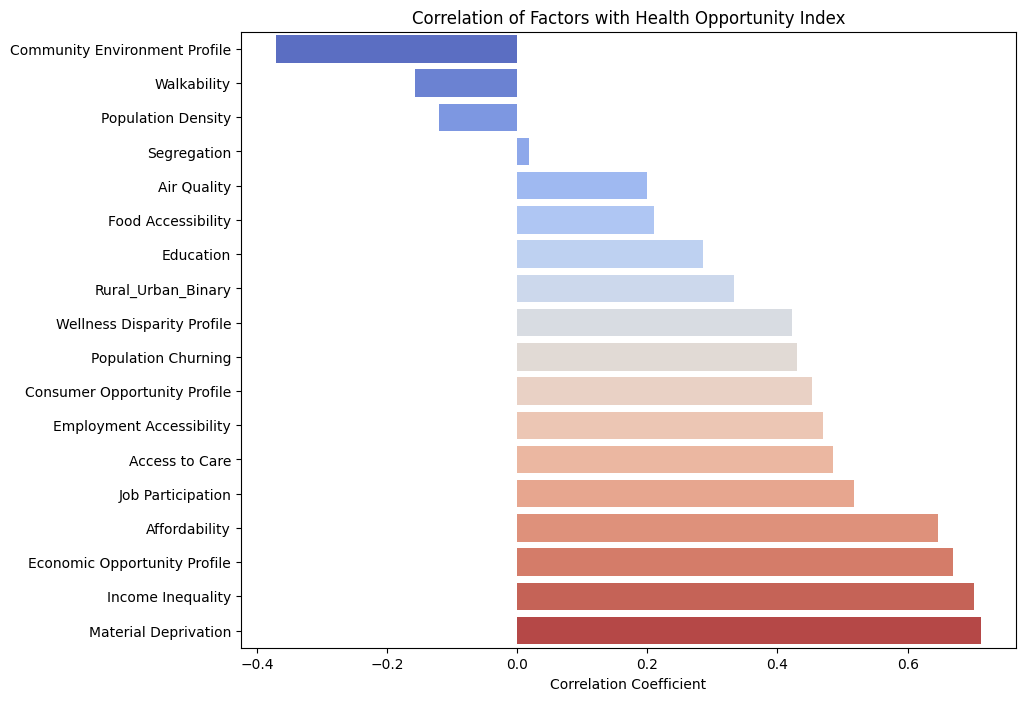

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = hoi_by_county_df.corr()
hoi_correlations = corr['Health Opportunity Index'].drop(labels=['Health Opportunity Index', 'Census Tract'])
hoi_correlations_sorted = hoi_correlations.sort_values(ascending=True)
plt.figure(figsize=(10, 8))
sns.barplot(x=hoi_correlations_sorted.values, y=hoi_correlations_sorted.index, palette='coolwarm')
plt.xlabel('Correlation Coefficient')
plt.title('Correlation of Factors with Health Opportunity Index')

plt.show()

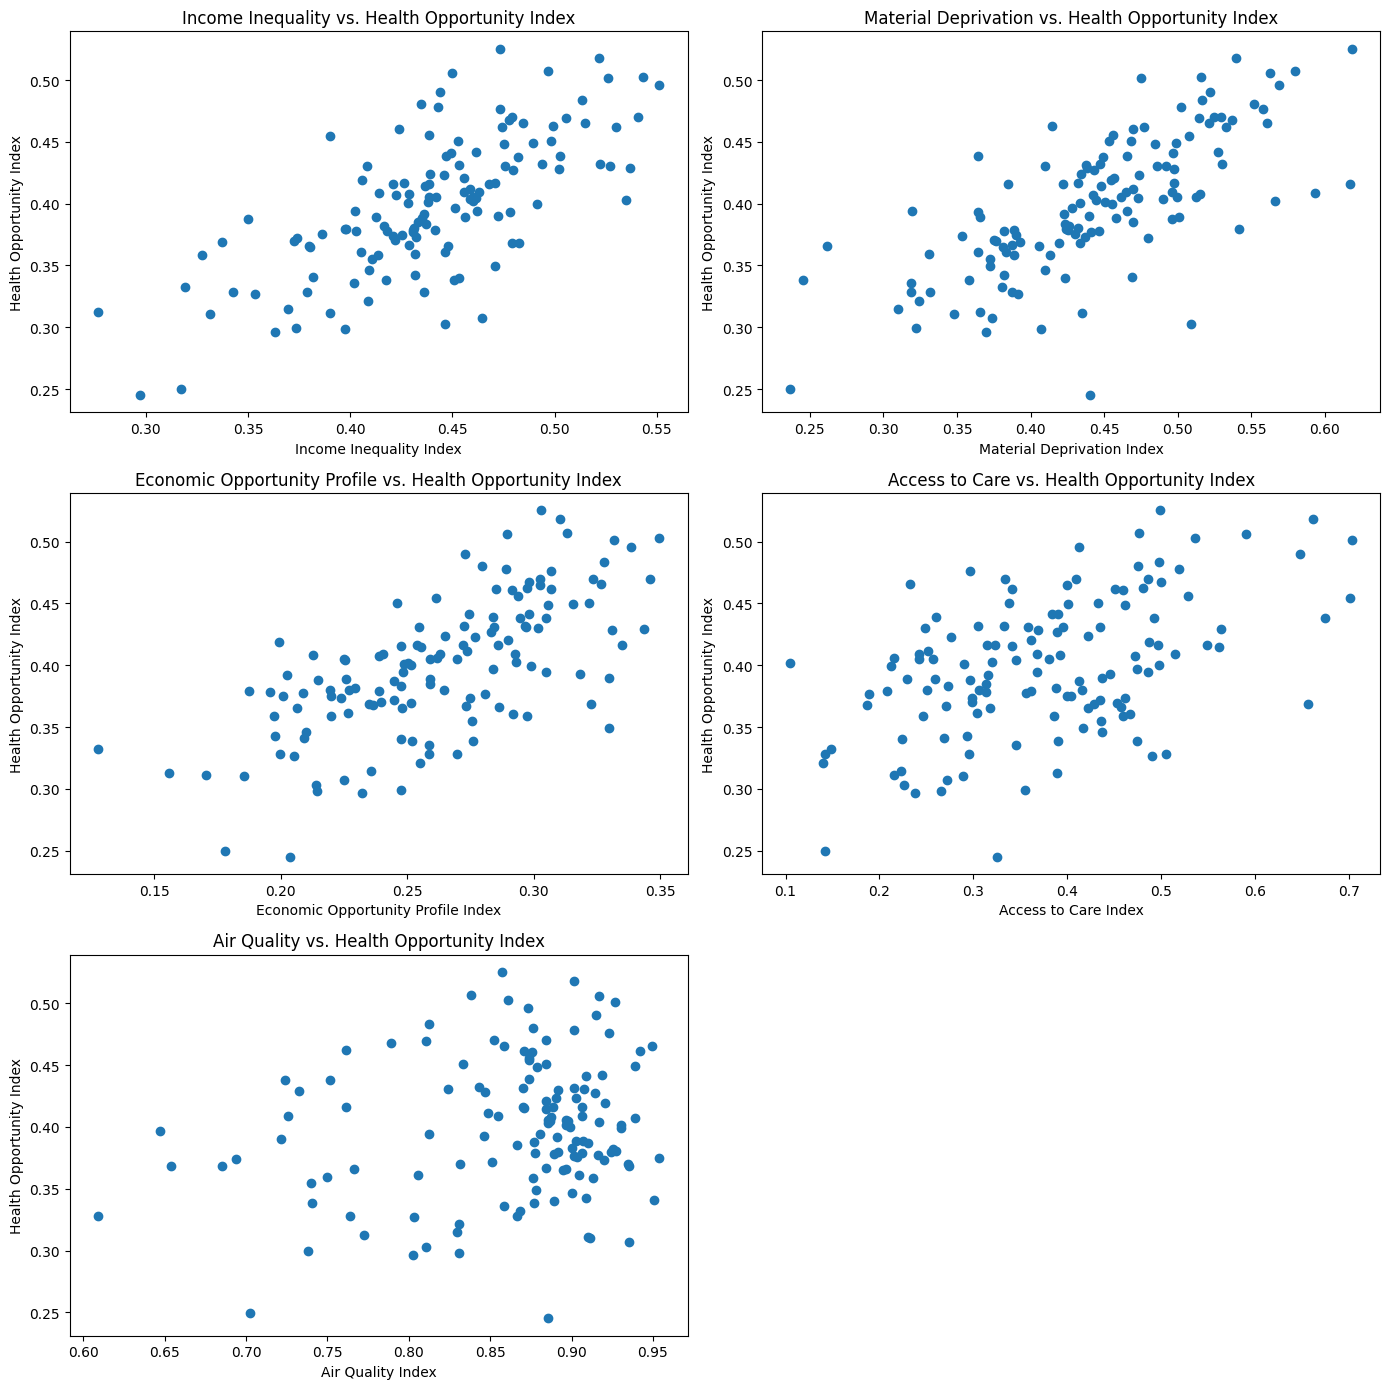

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
axes = axes.flatten()
variables = ['Income Inequality', 'Material Deprivation', 'Economic Opportunity Profile', 'Access to Care', 'Air Quality']
fig.delaxes(axes[-1])
for i, var in enumerate(variables):
    axes[i].scatter(hoi_by_county_df[var], hoi_by_county_df['Health Opportunity Index'])
    axes[i].set_title(f'{var} vs. Health Opportunity Index')
    axes[i].set_xlabel(f'{var} Index')
    axes[i].set_ylabel('Health Opportunity Index')
plt.tight_layout()
plt.show()

# Visualization of Overdose Dataset

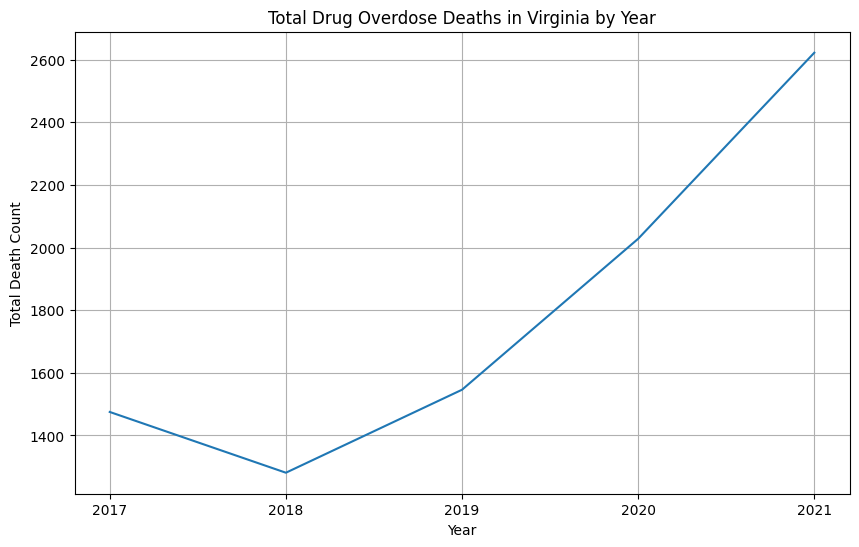

In [42]:
overdose_df = pd.read_csv('VDH-PUD-Overdose_Deaths_By-FIPS_20231106.csv')

yearly_deaths = overdose_df.groupby('Death Year')['Death Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_deaths, x='Death Year', y='Death Count')
plt.title('Total Drug Overdose Deaths in Virginia by Year')
plt.xlabel('Year')
plt.ylabel('Total Death Count')
plt.xticks(yearly_deaths['Death Year'])
plt.grid(True)
plt.show()

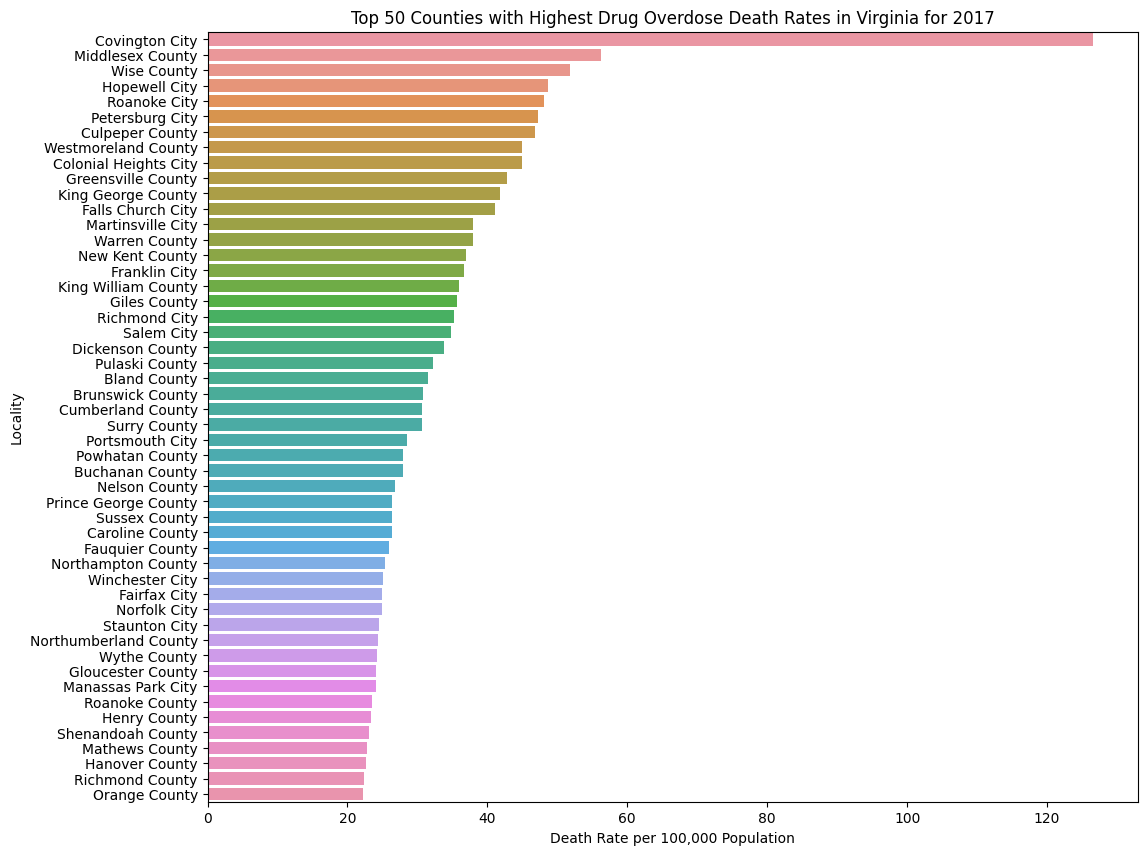

In [43]:
overdose_2017 = overdose_df[overdose_df['Death Year'] == 2017]

top_n_counties = overdose_2017.nlargest(50, 'Death Rate')

plt.figure(figsize=(12, 10))
sns.barplot(data=top_n_counties, y='Locality Name', x='Death Rate', orient='h')
plt.title('Top 50 Counties with Highest Drug Overdose Death Rates in Virginia for 2017')
plt.xlabel('Death Rate per 100,000 Population')
plt.ylabel('Locality')
plt.show()

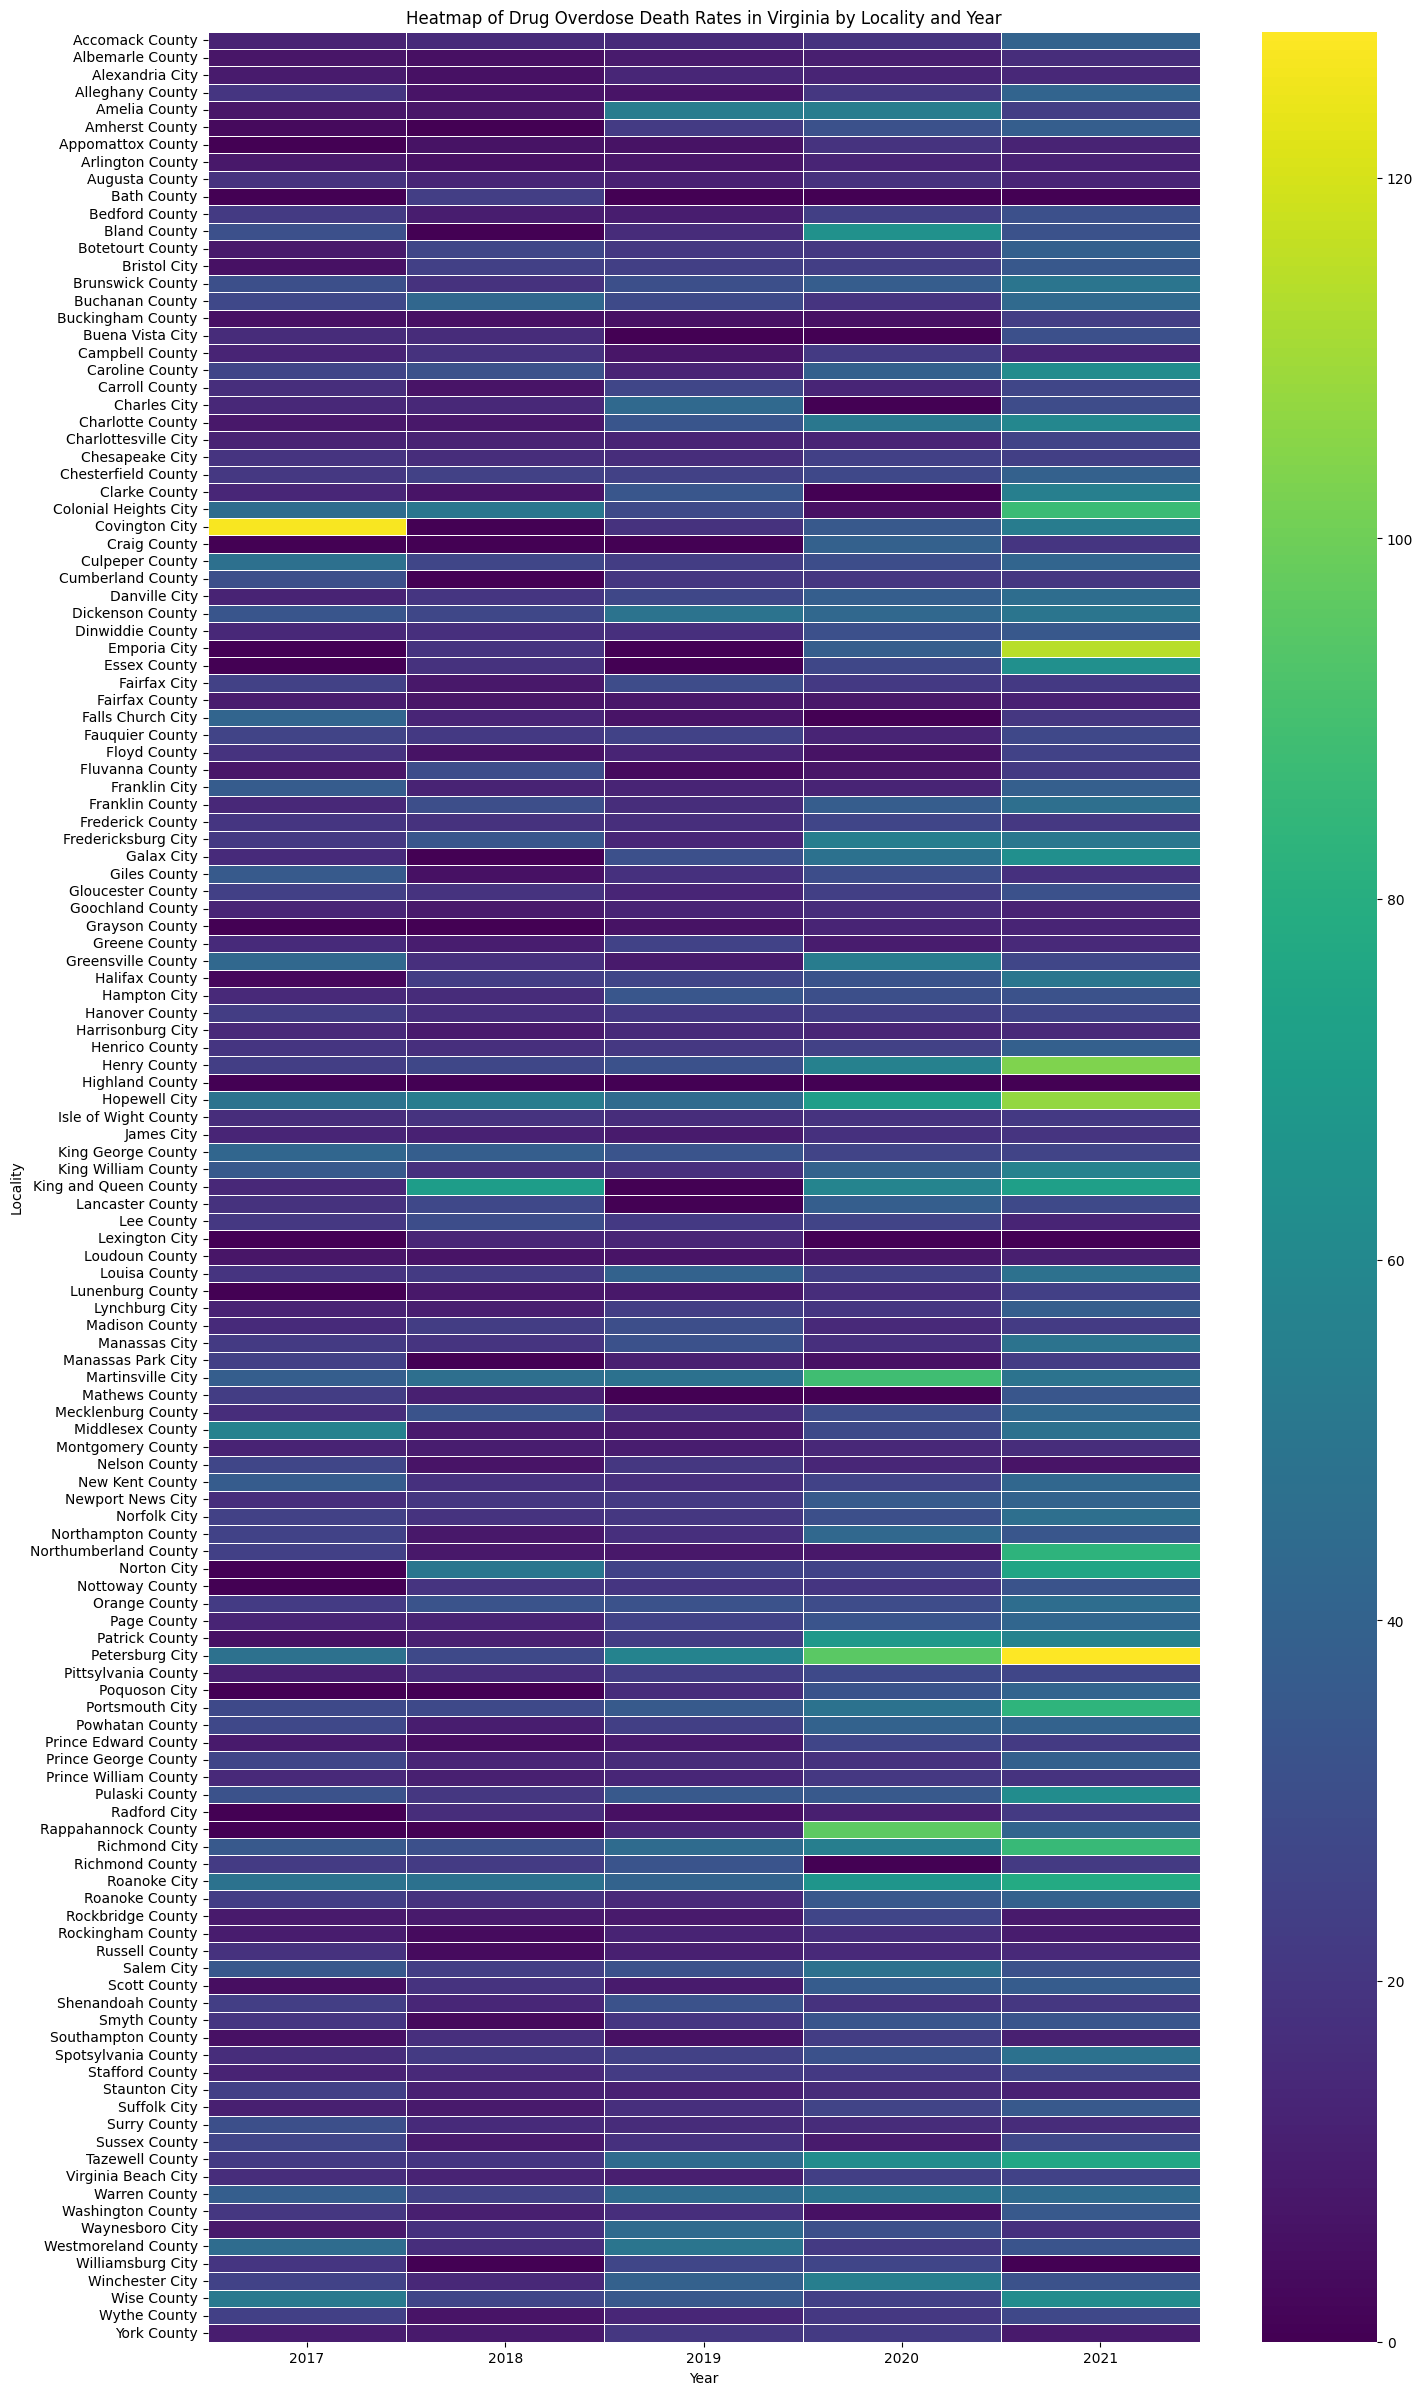

In [44]:
heatmap_data = overdose_df.pivot_table(values='Death Rate', index='Locality Name', columns='Death Year', aggfunc='mean')

plt.figure(figsize=(16, 30))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=.5, annot=False)
plt.title('Heatmap of Drug Overdose Death Rates in Virginia by Locality and Year')
plt.xlabel('Year')
plt.ylabel('Locality')
plt.show()

# Combine HOI and Overdose tables

In [45]:
overdose_df = pd.read_csv('VDH-PUD-Overdose_Deaths_By-FIPS_20231106.csv')
overdose_2021_df = overdose_df[overdose_df['Death Year'] == 2021].copy()
overdose_2021_df['VA FIPS'] = overdose_2021_df['VA FIPS'].astype(str)
hoi_by_county_df['VA FIPS'] = hoi_by_county_df['VA FIPS'].astype(str)
combined_df = pd.merge(overdose_2021_df, hoi_by_county_df, on='VA FIPS', how='left')

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Death Year                     133 non-null    int64  
 1   VA FIPS                        133 non-null    object 
 2   Locality Name                  133 non-null    object 
 3   Drug Class Legend              133 non-null    object 
 4   Death Count                    133 non-null    int64  
 5   Death Rate                     133 non-null    float64
 6   Census Tract                   133 non-null    float64
 7   Access to Care                 133 non-null    float64
 8   Employment Accessibility       133 non-null    float64
 9   Affordability                  133 non-null    float64
 10  Air Quality                    133 non-null    float64
 11  Population Churning            133 non-null    float64
 12  Education                      133 non-null    flo

In [46]:
correlation_matrix = combined_df.corr(numeric_only=True)
correlation_with_overdose = correlation_matrix[['Death Count', 'Death Rate']]
print(correlation_with_overdose)

                               Death Count  Death Rate
Death Year                             NaN         NaN
Death Count                       1.000000    0.237256
Death Rate                        0.237256    1.000000
Census Tract                      0.198379    0.228372
Access to Care                    0.250133   -0.075983
Employment Accessibility          0.451802   -0.097788
Affordability                     0.077036   -0.363995
Air Quality                      -0.403315   -0.240916
Population Churning              -0.224862    0.072094
Education                         0.284194   -0.317704
Food Accessibility                0.018997   -0.163365
Income Inequality                 0.231341   -0.106633
Job Participation                 0.380292   -0.081260
Population Density                0.365400   -0.069993
Segregation                       0.014635   -0.071642
Material Deprivation             -0.058462   -0.417386
Walkability                       0.407944    0.082822
Community 

In [47]:
correlation_matrix = combined_df.corr(numeric_only=True)
correlation_with_overdose = correlation_matrix[['Death Count', 'Death Rate']]
print(correlation_with_overdose)

                               Death Count  Death Rate
Death Year                             NaN         NaN
Death Count                       1.000000    0.237256
Death Rate                        0.237256    1.000000
Census Tract                      0.198379    0.228372
Access to Care                    0.250133   -0.075983
Employment Accessibility          0.451802   -0.097788
Affordability                     0.077036   -0.363995
Air Quality                      -0.403315   -0.240916
Population Churning              -0.224862    0.072094
Education                         0.284194   -0.317704
Food Accessibility                0.018997   -0.163365
Income Inequality                 0.231341   -0.106633
Job Participation                 0.380292   -0.081260
Population Density                0.365400   -0.069993
Segregation                       0.014635   -0.071642
Material Deprivation             -0.058462   -0.417386
Walkability                       0.407944    0.082822
Community 

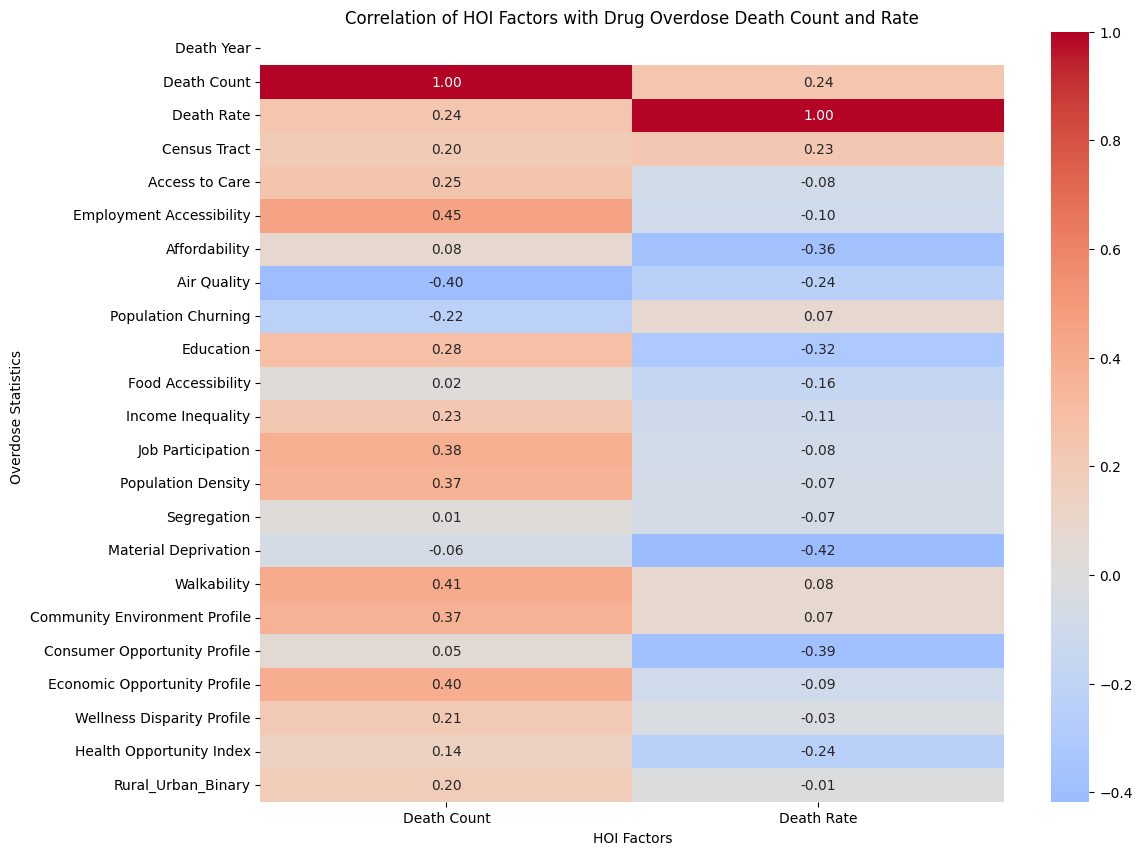

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_with_overdose, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation of HOI Factors with Drug Overdose Death Count and Rate')
plt.xlabel('HOI Factors')
plt.ylabel('Overdose Statistics')
plt.show()

In [49]:
urban_rural_impact = combined_df.groupby('Rural_Urban_Binary')[['Death Count', 'Death Rate']].mean().reset_index()

print(urban_rural_impact)

   Rural_Urban_Binary  Death Count  Death Rate
0                   0     8.969697   36.418182
1                   1    23.260000   35.820000


# Linear Regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = combined_df.drop(columns=['Death Year', 'Census Tract', 'VA FIPS', 'Locality Name', 'Drug Class Legend', 'Death Count', 'Death Rate', 'Access to Care', 'Employment Accessibility', 'Population Churning', 'Income Inequality', 'Job Participation', 'Population Density', 'Segregation', 'Walkability', 'Community Environment Profile', 'Economic Opportunity Profile', 'Wellness Disparity Profile', 'Rural_Urban_Binary'])
y = combined_df['Death Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

print('Intercept:', model.intercept_)
print('Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

# Code based on: https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

Mean Squared Error (MSE): 331.3911456761494
R-squared (R2): 0.18294150891686134
Intercept: 362.303808977557
Coefficients:
Affordability: -18.472606684834858
Air Quality: -131.7206745900837
Education: -236.0457876906242
Food Accessibility: -52.24941190293383
Material Deprivation: -30.976963897573864
Consumer Opportunity Profile: 29.300167631313684
Health Opportunity Index: 16.803849878113514
     Actual  Predicted
51     12.9  42.979903
69     39.8  27.497998
31     21.9  24.683691
42     38.9  42.089919
117    40.2  35.668956
77      8.8  29.318418
127    11.9  35.986261
56     34.2  24.084424
40     50.5  42.077049
12     49.9  37.907465
81     20.5  28.358128
26     34.9  48.338365
108    63.5  39.301876
100    87.2  49.898965
66     41.8  41.831097
83     11.3  38.731498
4      37.9  49.033979
27     64.0  42.705382
19     59.2  44.166873
123    21.9  22.539111
36     12.3  24.686003
16     61.6  38.112103
18     29.3  42.689307
10     32.1  33.409999
65     45.1  28.248277
44      

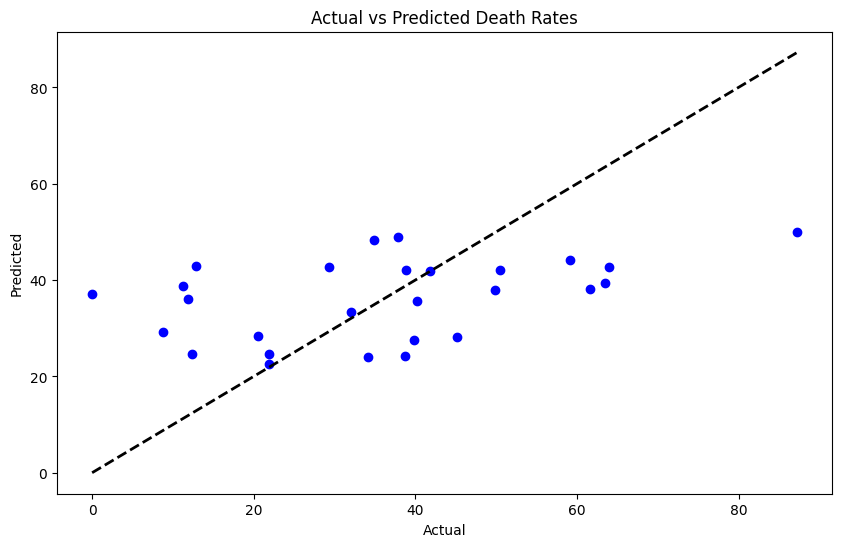

In [51]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Death Rates')
plt.show()


# Classification Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer, StandardScaler

mean_death_rate = overdose_2021_df['Death Rate'].mean()
overdose_2021_df['Overdose_Rate_Category'] = overdose_2021_df['Death Rate'].apply(lambda x: 'high' if x > mean_death_rate else 'low')

combined_df = pd.merge(overdose_2021_df, hoi_by_county_df, on='VA FIPS', how='left')

combined_df['Interaction_Afford_Educ'] = combined_df['Affordability'] * combined_df['Education']
poly = PolynomialFeatures(2, include_bias=False)
affordability_poly = poly.fit_transform(combined_df[['Affordability']])
combined_df['Affordability^2'] = affordability_poly[:, 1]
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
combined_df['PopDensity_Binned'] = kbin.fit_transform(combined_df[['Population Density']])
combined_df['Interaction_AirQuality_Educ'] = combined_df['Air Quality'] * combined_df['Education']
combined_df['Interaction_FoodAcc_IncomeIneq'] = combined_df['Food Accessibility'] * combined_df['Income Inequality']
education_poly = poly.fit_transform(combined_df[['Education']])
combined_df['Education^2'] = education_poly[:, 1]
combined_df['IncomeInequality_Binned'] = kbin.fit_transform(combined_df[['Income Inequality']])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df[['Affordability', 'Education', 'Air Quality', 'Food Accessibility']])
scaled_feature_cols = ['Affordability_Scaled', 'Education_Scaled', 'AirQuality_Scaled', 'FoodAccessibility_Scaled']
combined_df[scaled_feature_cols] = scaled_features

X = combined_df.drop(['Overdose_Rate_Category', 'Death Rate', 'Death Year', 'VA FIPS', 'Locality Name', 'Drug Class Legend'], axis=1)
y = combined_df['Overdose_Rate_Category']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

params = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 15]
}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid=params, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

print(f"Threshold for categorizing 'high' and 'low' overdose rates: {mean_death_rate}")

# Code based from: https://www.datacamp.com/tutorial/decision-tree-classification-python

              precision    recall  f1-score   support

        high       0.71      0.74      0.72        23
         low       0.74      0.71      0.72        24

    accuracy                           0.72        47
   macro avg       0.72      0.72      0.72        47
weighted avg       0.72      0.72      0.72        47

Threshold for categorizing 'high' and 'low' overdose rates: 35.968421052631584


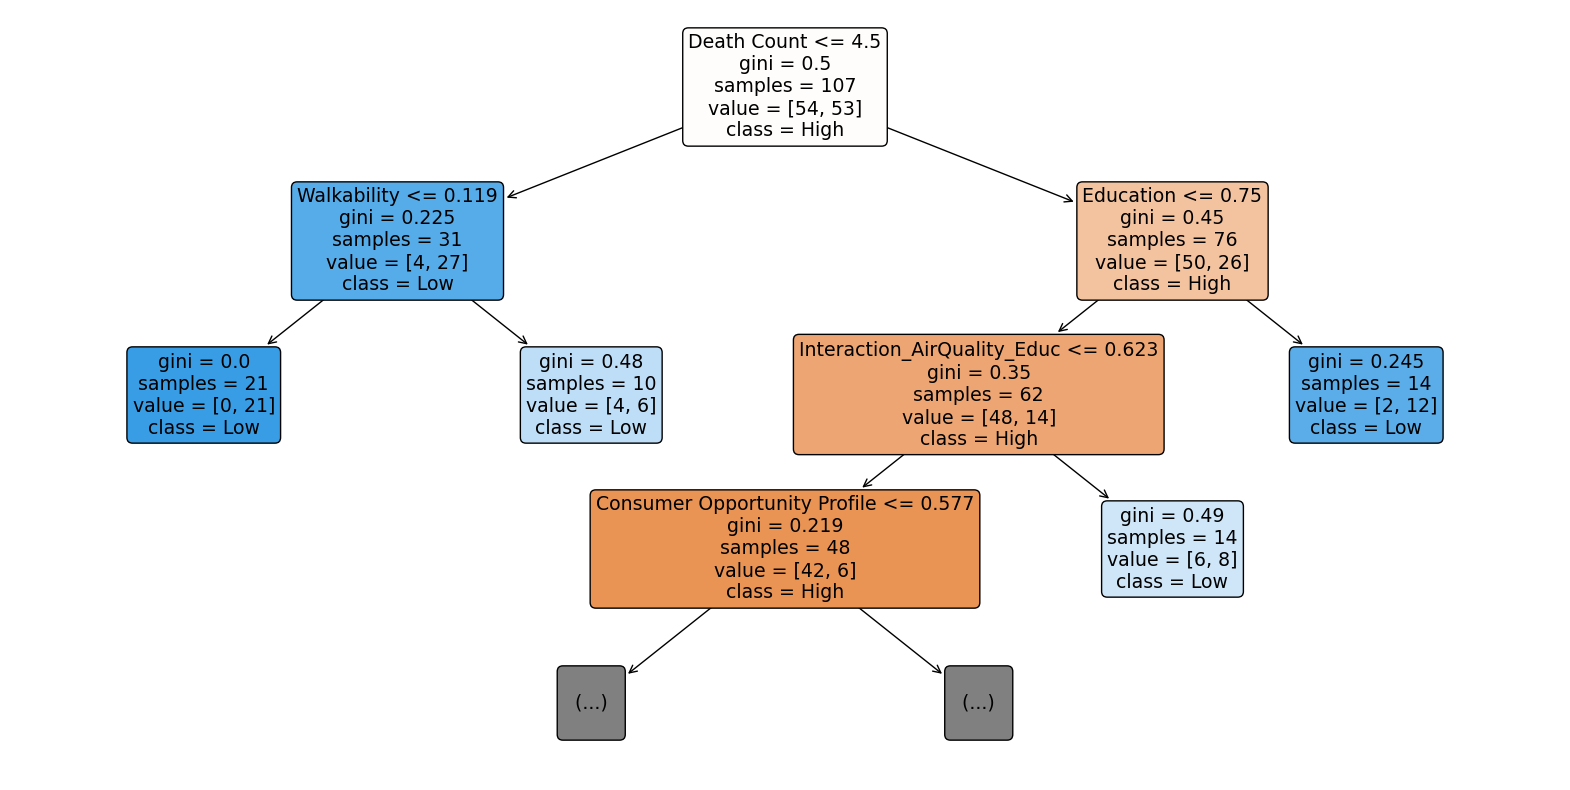

In [70]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, rounded=True, class_names=['High', 'Low'], feature_names=X.columns, max_depth=3)
plt.show()

In [71]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

class_report = classification_report(y_test, y_pred, output_dict=True)

metrics_summary = {
    "Class": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for class_label, metrics in class_report.items():
    if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
        metrics_summary["Class"].append(class_label)
        metrics_summary["Precision"].append(f"{metrics['precision']:.2f}")
        metrics_summary["Recall"].append(f"{metrics['recall']:.2f}")
        metrics_summary["F1-Score"].append(f"{metrics['f1-score']:.2f}")

summary_df = pd.DataFrame(metrics_summary)

print("Classification Metrics Summary:")
print(summary_df)

Classification Metrics Summary:
  Class Precision Recall F1-Score
0  high      0.71   0.74     0.72
1   low      0.74   0.71     0.72
